# #03 Data Visualization: show your skill of storytelling from data

![title](https://cdn-images-1.medium.com/max/800/1*1prncLBhVW1Mf_rH-dxiJQ.jpeg)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

## 1. Visualizing statistical relationships
- scatterplot() (with kind="scatter"; the default)
- lineplot() (with kind="line")

### A) Scatter Plot 散布図
sns.relplot(x軸のカラム名, y軸のカラム名, データフレーム)  
関係＝relationship=relplot

In [39]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


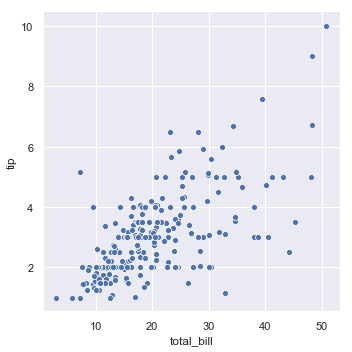

In [6]:
# correlation betwee 2 variables
tips = sns.load_dataset("tips")
sns.relplot(x="total_bill", y="tip", data=tips)

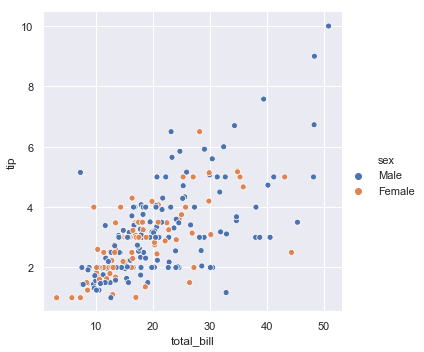

In [17]:
# correlation betwee 3 variables by "hue"
sns.relplot(x="total_bill", y="tip", hue="sex", data=tips)

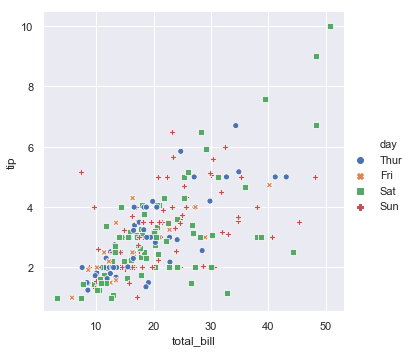

In [20]:
# we can change style as well
sns.relplot(x="total_bill", y="tip", hue="day", style="day", data=tips);

hue=軸ではなく色でデータを表現するということ

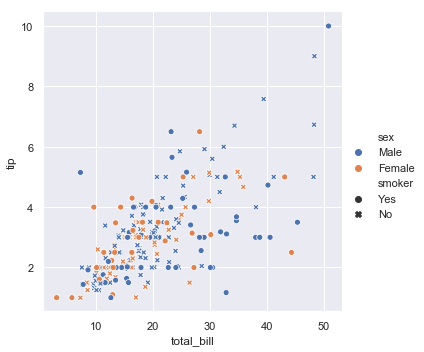

In [19]:
# correlation betwee 4 variables by using different "hue" and "style"
sns.relplot(x="total_bill", y="tip", hue="sex", style="smoker", data=tips);

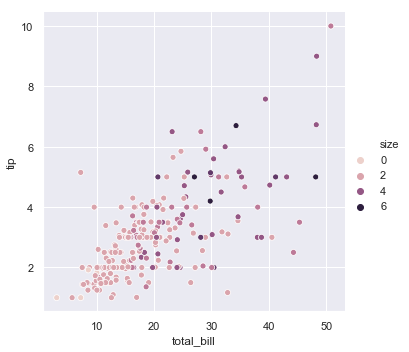

In [21]:
# hue=sequential value
sns.relplot(x="total_bill", y="tip", hue="size", data=tips);

sizeはサイズで意味合いを表現できる

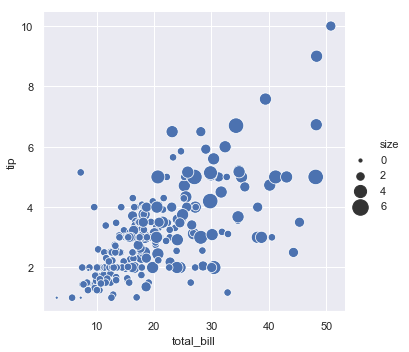

In [24]:
# express by plot size
sns.relplot(x="total_bill", y="tip", size="size", sizes=(10, 240), data=tips);

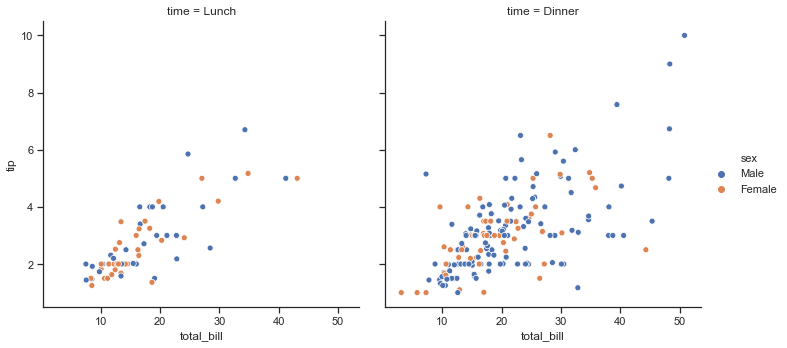

In [45]:
# more than 3 variable
sns.relplot(x="total_bill", y="tip", hue="sex", col="time", data=tips);

## 2. Categorical scatterplots
### A) 散布図 Categorical scatterplots:  

- stripplot() (with kind="strip"; the default)
- swarmplot() (with kind="swarm")  

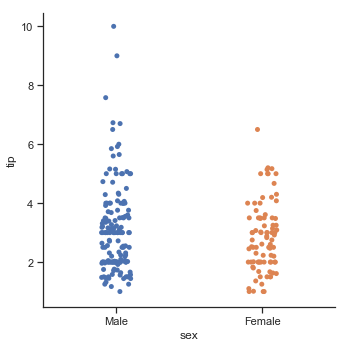

In [26]:
# correlation between 2 variables(1 category)
sns.set(style="ticks", color_codes=True)
sns.catplot(x="sex", y="tip", data=tips);

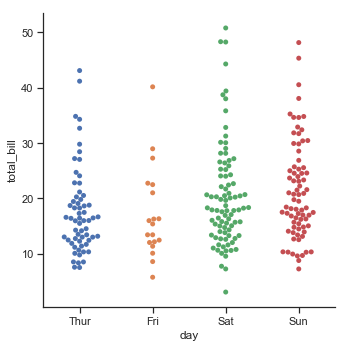

In [28]:
# prevent duplicates
sns.catplot(x="day", y="total_bill", kind="swarm", data=tips);

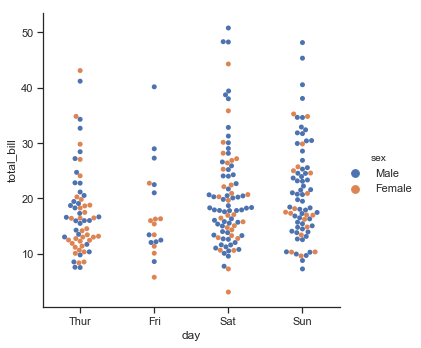

In [29]:
# correlation between 3 variables(2category)
sns.catplot(x="day", y="total_bill", hue="sex", kind="swarm", data=tips);

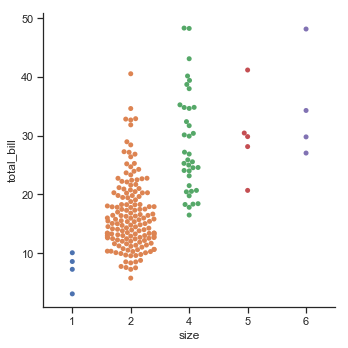

In [42]:
# 含めたくないカテゴリを指定できる
sns.catplot(x="size", y="total_bill", kind="swarm", data=tips.query("size != 3"));

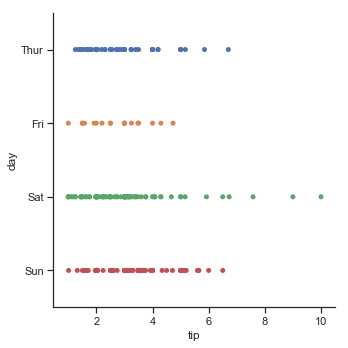

In [43]:
# T
sns.catplot(x="tip", y="day", jitter=False, data=tips);

### B) 分布図 Categorical distribution plots:  
- boxplot() (with kind="box")
- violinplot() (with kind="violin")
- boxenplot() (with kind="boxen")   

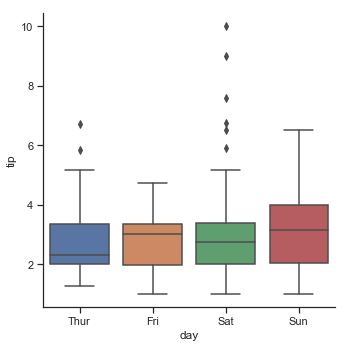

In [54]:
# categoryでもいける、こっちで覚えよう
ax = sns.catplot(x="day", y="tip", data=tips, kind="box")

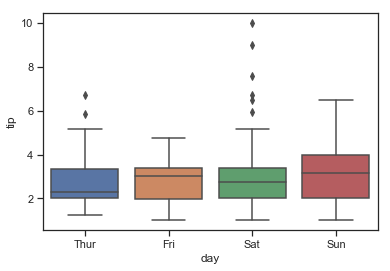

In [51]:
# Boxplots
ax = sns.boxplot(x="day", y="tip", data=tips)

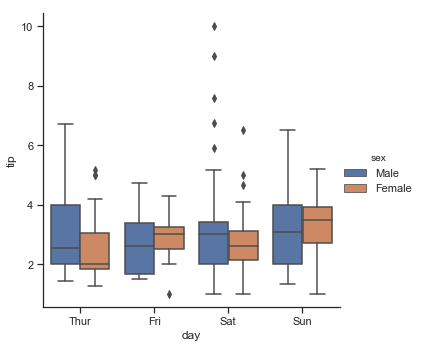

In [56]:
# 3 variables
ax = sns.catplot(x="day", y="tip", hue="sex", data=tips, kind="box")

### C)  Violin plot

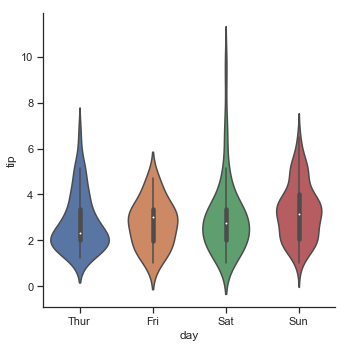

In [61]:
# violin
sns.catplot(x="day", y="tip", kind="violin", data=tips);

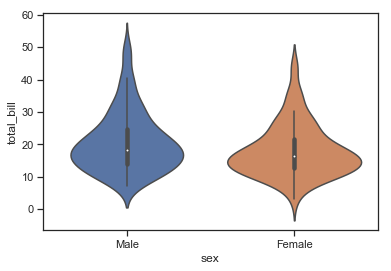

In [63]:
# violinplot
ax = sns.violinplot(x="sex", y="total_bill", data=tips)

In [64]:
from scipy import stats
sns.set(color_codes=True)

### D) Plotting univariate distributions

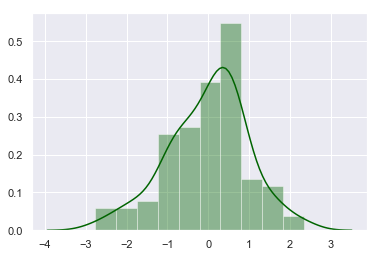

In [83]:
x = np.random.normal(size=100)
sns.distplot(x, color="darkgreen")

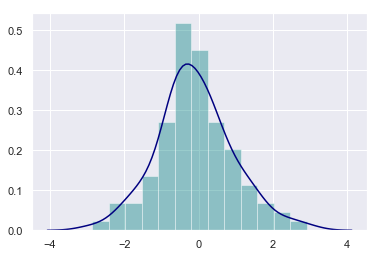

In [101]:
# we can pass keyword arguments for each individual component of the plot
x = np.random.normal(size=100)
sns.distplot(x, hist_kws={"color": "Teal"}, kde_kws={"color": "Navy"});

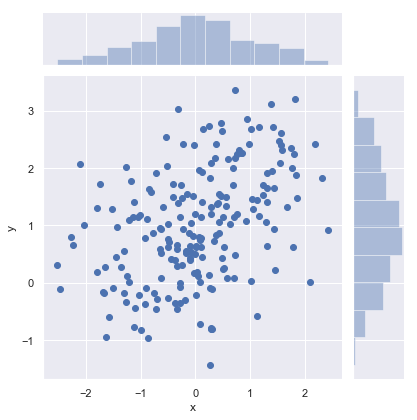

In [84]:
mean, cov = [0, 1], [(1, .5), (.5, 1)]
data = np.random.multivariate_normal(mean, cov, 200)
df = pd.DataFrame(data, columns=["x", "y"])
sns.jointplot(x="x", y="y", data=df);

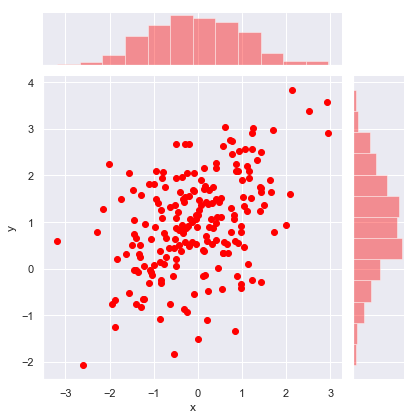

In [89]:
mean, covariance = [0, 1], [(1, 0.5), (0.5, 1)]
data = np.random.multivariate_normal(mean, covariance, 200)
df = pd.DataFrame(data, columns = ["x", "y"])
sns.jointplot(x="x", y="y", data=df, color="red");

In [105]:
titanic = sns.load_dataset("titanic")
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


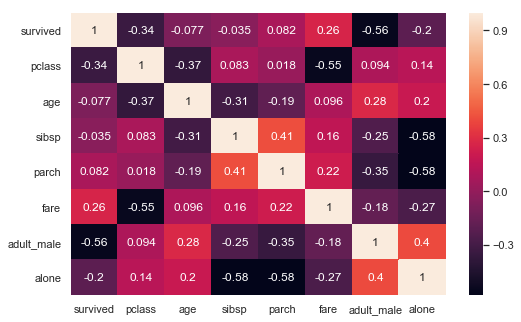

In [117]:
cor = titanic.corr()
plt.figure(figsize=(8.4,5.2))
sns.heatmap(cor, annot=True)

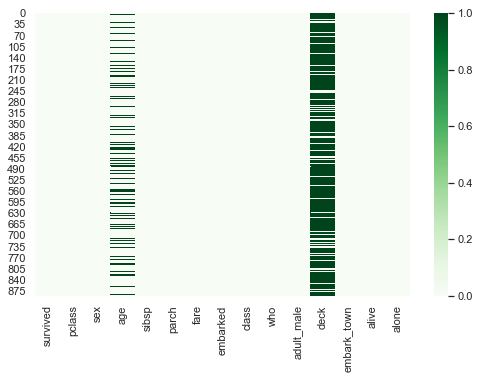

In [127]:
nan = titanic.isnull()
titanic = sns.load_dataset("titanic")
sns.heatmap(nan, cmap="Greens")

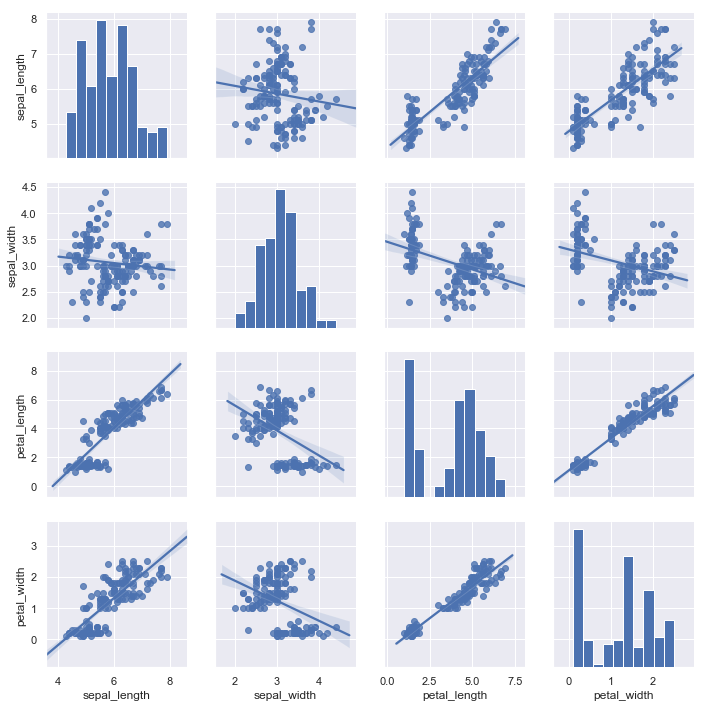

In [147]:
g = sns.pairplot(iris, kind="reg", palette="Reds")

In [129]:
g = sns.PairGrid(df[["mpg", "horsepower", "weight", "origin"]], hue="origin") 
g.map_upper(sns.regplot) 
g.map_lower(sns.residplot) 
g.map_diag(plt.hist) 
for ax in g.axes.flat: 
    plt.setp(ax.get_xticklabels(), rotation=45) 
g.add_legend() 
g.set(alpha=0.5)

KeyError: "['mpg' 'horsepower' 'weight' 'origin'] not in index"

KeyError: 'species'

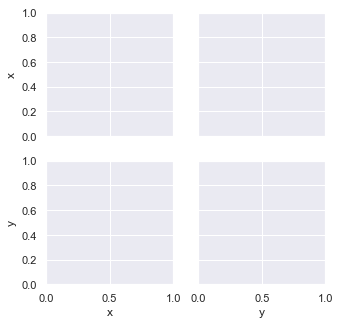

In [130]:
sns.pairplot(df, hue='species', kind='reg')